In [3]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
    using StaticArrays, DifferentialEquations, BenchmarkTools, CairoMakie
        include("C:\\Users\\Alex\\Desktop\\dynamical-systems\\system.jl");
    #include("C:\\Users\\Alex\\Desktop\\dynamical-systems\\visual.jl");
else
    username = "nova"
    pathtorepo = "/home/nova/work/repo_ds/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
    using StaticArrays, DifferentialEquations, JLD2, CairoMakie
    include("/home/nova/work/repo_ds/dynamical-systems/system.jl")
    #include("/home/nova/work/repo_ds/dynamical-systems/visual.jl")
end

  Activating project at `~/work/repo_ds/dynamical-systems/env/integrate`


TM6_glial_ECM_help (generic function with 1 method)

In [4]:
tstart = 0.0; tend = 3000; tspan = (tstart, tend);

In [36]:
u0 = SA[0.9445509341100914, 0.74116702856987, 0.7361196042973006, 0.0646914552140727, 0.15145764079879162, 0.0009327645775731449];
param = TM6_glial_ECM_get_params();
dict, indexparams = TM6_glial_ECM_help(param);
println(indexparams);


    τ - 1, τD - 2, τF - 3, τy - 4, α - 5, αE - 6, αecm - 7, αp - 8,
    J - 9, U0 - 10, I0 - 11, ΔU0 - 12, β - 13, βecm  -14, βp - 15,
    γp - 16, ecm0 - 17, ecm1 - 18, kecm - 19, θecm - 20, p0 - 21, p1 - 22, θp - 23, kp - 24, ythr - 25, xthr - 26


In [46]:
    prob = ODEProblem(TM6_glial_ECM, SA[1.6096689157551314, 0.8163280494931, 0.7125792760322924, 0.0397773660051715, 0.09165827474971937, 0.06306424470079573], tspan, param)

ODEProblem with uType SVector{6, Float64} and tType Float64. In-place: false
timespan: (0.0, 3000.0)
u0: 6-element SVector{6, Float64} with indices SOneTo(6):
 1.6096689157551314
 0.8163280494931
 0.7125792760322924
 0.0397773660051715
 0.09165827474971937
 0.06306424470079573

In [47]:
prob.p[6]=0.6613373493975904

0.6613373493975904

In [99]:
tol = 1e-12
sol = solve(prob, Vern9(), abstol = tol, reltol = tol, saveat = 0.001)

retcode: Success
Interpolation: 1st order linear
t: 3000001-element Vector{Float64}:
    0.0
    0.001
    0.002
    0.003
    0.004
    0.005
    0.006
    0.007
    0.008
    0.009
    ⋮
 2999.992
 2999.993
 2999.994
 2999.995
 2999.996
 2999.997
 2999.998
 2999.999
 3000.0
u: 3000001-element Vector{SVector{6, Float64}}:
 [1.6096689157551314, 0.8163280494931, 0.7125792760322924, 0.0397773660051715, 0.09165827474971937, 0.06306424470079573]
 [1.6205665556557785, 0.8166120924822491, 0.7123061637063739, 0.039824610052952916, 0.09165760506079453, 0.06306361406150193]
 [1.6316772394022858, 0.8168879061309772, 0.7120344059679347, 0.03987215520595554, 0.0916569353825429, 0.06306298342851448]
 [1.643008309613005, 0.8171554280344906, 0.711764021310456, 0.03991999283471205, 0.09165626571496427, 0.06306235280183334]
 [1.6545674489972995, 0.8174145920687103, 0.7114950288881806, 0.039968114132927245, 0.0916555960580584, 0.06306172218145842]
 [1.6663626990837, 0.8176653282245615, 0.711227448546974

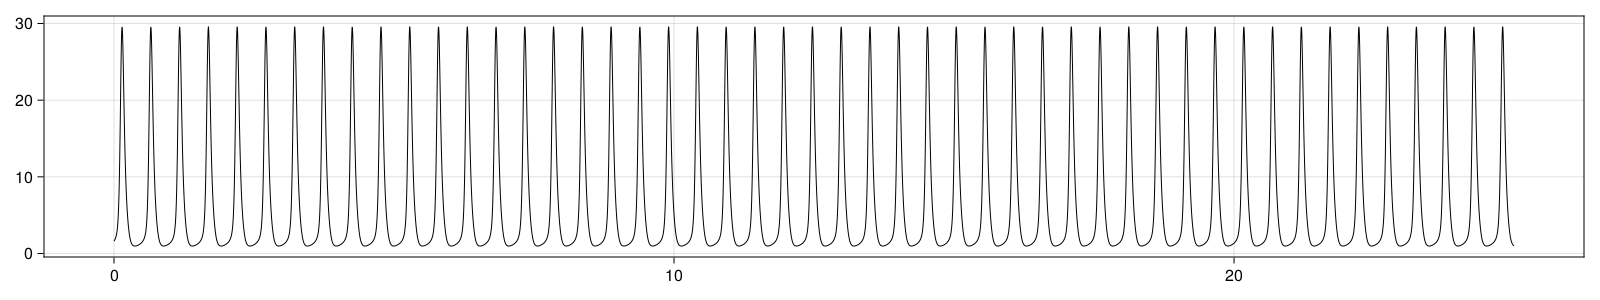

CairoMakie.Screen{IMAGE}


In [97]:
tstart = 1; tend = 25000;

width_ = 1600; height_ = 300;
lw = 1.0; color_ = :black;
CairoMakie.activate!()
f = Figure(resolution = (width_, height_))
ax = Axis(f[1, 1]);
lines!(sol.t[tstart:tend], sol[1, tstart:tend], linewidth = lw, color = color_);
display(f)